In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#Rutes
OUTPUT = '../Outputs/'

In [4]:
#Load previos results

#Dataset from the supervised model
df_super = pd.read_csv(OUTPUT + "supervised_predictions.csv")

#Dataset from the unsupervised model
df_unsuper = pd.read_csv(OUTPUT + "features_clustered.csv")

In [5]:
#Validate Dataframe structure
print("\nSupervised Columns", df_super.columns.to_list())
print("\nUnsupervised Columns", df_unsuper.columns.to_list())


Supervised Columns ['real_label', 'pred_rf', 'pred_svm', 'pred_knn']

Unsupervised Columns ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label', 'Cl

In [6]:
# Join both Datasets
# Make sure they are in the same order by filename
if "filename" in df_super.columns and "filename" in df_unsuper.columns:
    df_merged = pd.merge(df_super, df_unsuper[["filename", "cluster"]], on="filename", how="inner")
else:
    # If there is not filename, simply concatete by index
    df_merged = pd.concat([df_super, df_unsuper["cluster"]], axis=1)

print("Combinate Data", df_merged.shape)
df_merged.head()

Combinate Data (1000, 5)


,real_label,pred_rf,pred_svm,pred_knn,cluster
0,classical,classical,classical,classical,8
1,blues,blues,blues,blues,3
2,metal,disco,disco,disco,8
3,jazz,jazz,jazz,jazz,5
4,blues,blues,blues,blues,5


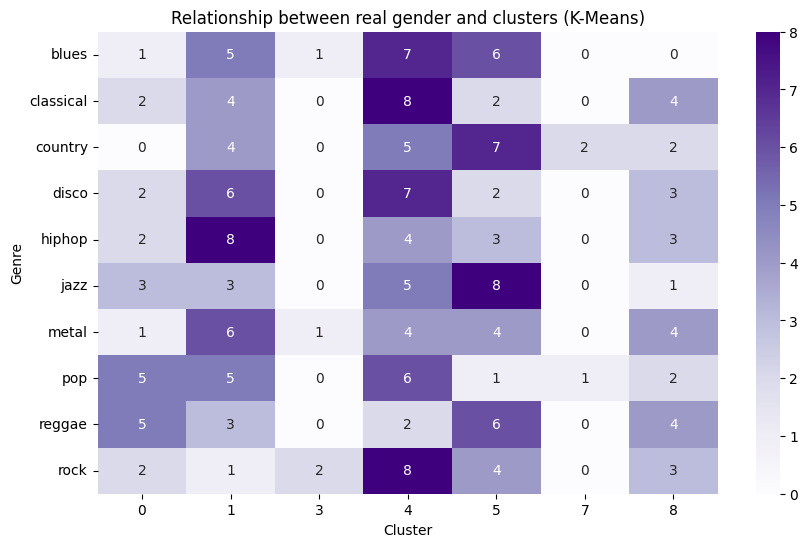

In [7]:
# Compare supervised vs. unsupervised results
# Let's see if the clusters align with the actual labels and predictions.

# Crosstabulation between genres and clusters
cluster_comparison = pd.crosstab(df_merged["real_label"], df_merged["cluster"])
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_comparison, cmap="Purples", annot=True, fmt='d')
plt.title("Relationship between real gender and clusters (K-Means)")
plt.xlabel("Cluster")
plt.ylabel("Genre")
plt.show()


In [8]:
# Convert all columns to str
df_merged['real_label'] = df_merged['real_label'].astype(str)
df_merged['pred_rf'] = df_merged['pred_rf'].astype(str)
df_merged['pred_svm'] = df_merged['pred_svm'].astype(str)
df_merged['pred_knn'] = df_merged['pred_knn'].astype(str)


In [10]:
# Evalute the performance of the supervised model
print("\n=== Supervised Model Report - Random Forest ===")
print(classification_report(df_merged["real_label"], df_merged["pred_rf"]))
print("Accuracy (Random Forest):", accuracy_score(df_merged["real_label"], df_merged["pred_rf"]))

print("\n=== Supervised Model Report - SVM ===")
print(classification_report(df_merged['real_label'], df_merged['pred_svm']))
print("Accuracy (SVM):", accuracy_score(df_merged['real_label'], df_merged['pred_svm']))

print("\n=== Supervised Model Report - KNN ===")
print(classification_report(df_merged['real_label'], df_merged['pred_knn']))
print("Accuracy (KNN):", accuracy_score(df_merged['real_label'], df_merged['pred_knn']))



=== Supervised Model Report - Random Forest ===
              precision    recall  f1-score   support

       blues       0.83      0.75      0.79        20
   classical       0.83      0.95      0.88        20
     country       0.70      0.80      0.74        20
       disco       0.75      0.60      0.67        20
      hiphop       0.67      0.80      0.73        20
        jazz       0.76      0.80      0.78        20
       metal       0.89      0.85      0.87        20
         nan       1.00      1.00      1.00       800
         pop       0.85      0.85      0.85        20
      reggae       0.76      0.80      0.78        20
        rock       0.80      0.60      0.69        20

    accuracy                           0.96      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.96      0.96      0.96      1000

Accuracy (Random Forest): 0.956

=== Supervised Model Report - SVM ===
              precision    recall  f1-score   support

       blues

cluster
0    nan
1    nan
2    nan
3    nan
4    nan
5    nan
6    nan
7    nan
8    nan
9    nan
Name: real_label, dtype: object


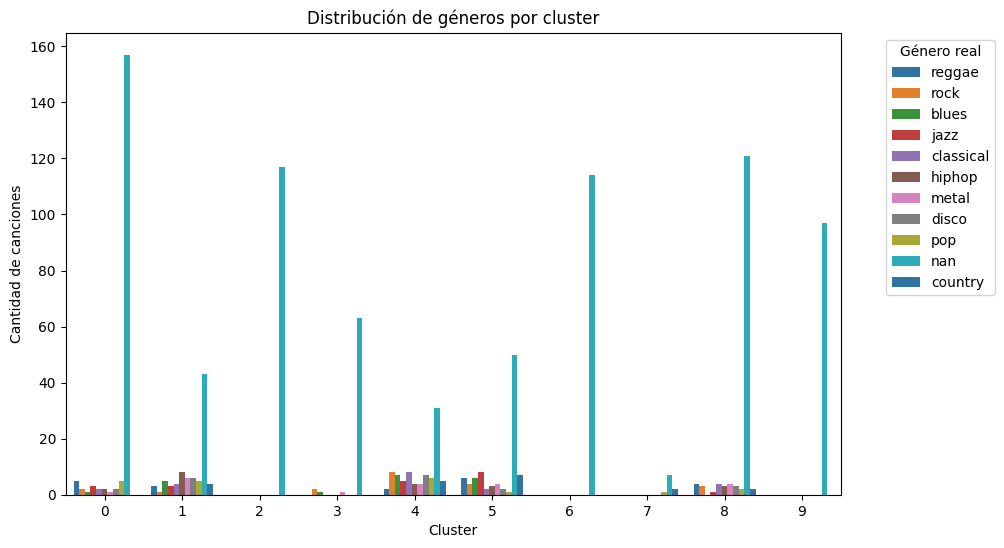

In [ ]:
# Analyze matches between clusters and predictions

df_valid = df_merged.dropna(subset=["real_label"])
cluster_labels = df_valid.groupby("cluster")["real_label"].agg(lambda x: x.value_counts().index[0])
print(cluster_labels)


plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x="cluster", hue="real_label", palette="tab10")
plt.title("Distribución de géneros por cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de canciones")
plt.legend(title="Género real", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Revisar NaNs en ambos datasets
print("Supervised NaNs:\n", df_super.isna().sum())
print("Unsupervised NaNs:\n", df_unsuper.isna().sum())

# Revisar filas afectadas después del merge
print("Merged NaNs:\n", df_merged.isna().sum())


Supervised NaNs:
 real_label    0
pred_rf       0
pred_svm      0
pred_knn      0
dtype: int64
Unsupervised NaNs:
 length              0
chroma_stft_mean    0
chroma_stft_var     0
rms_mean            0
rms_var             0
                   ..
mfcc20_mean         0
mfcc20_var          0
label               0
Cluster             0
cluster             0
Length: 61, dtype: int64
Merged NaNs:
 real_label    0
pred_rf       0
pred_svm      0
pred_knn      0
cluster       0
dtype: int64
